In [ ]:
import tweepy
from login_keys import consumer_key ,consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
public_tweets = api.home_timeline(count=50)

In [27]:
import re

filtered_text = ""
for tweet in public_tweets:
    print(tweet.text)
    filtered_text += re.sub(r"http\S+", "", tweet.text)

Beyonc√© encendi√≥ las redes con estas fotos desnuda https://t.co/yavlsjgVZD
"Si vos hubieras trabajado como yo en esto, hubieras encontrado gente de todos los partidos", le respondi√≥ Claudia‚Ä¶ https://t.co/XTZJZDW3XR
"Hay que aprobarla porque a partir de ahora todos sabemos lo que pasa en la Argentina", dijo la escritora Claudia P‚Ä¶ https://t.co/bptSMPxZtQ
Moyano y el kirchnerismo se juegan la vida https://t.co/Z7Wrk4s2bb https://t.co/eSOqGPb0eZ
Se venden 5 Funko Pop edicion limitada en la convenci√≥n #E32018 
De esos hay 2 que tienen 1500 unidades producidas‚Ä¶ https://t.co/5DkBVOaH3W
No importa la dieta: la raz√≥n por la que s√≠ o s√≠ ten√©s que comer banana
https://t.co/SnqU9emhwP
8 grandes secretos que revela tu lengua sobre tu salud https://t.co/kA5TWNcFYH
RT @TNFamosos: En el programa de Pampita se vivi√≥ otro inc√≥modo momento: Sol P√©rez se molest√≥ y le pas√≥ factura a la conductora https://t.c‚Ä¶
La fascinante y arriesgada historia de los pioneros de la exploraci√≥n atmos

In [28]:
filtered_text

'Beyonc√© encendi√≥ las redes con estas fotos desnuda "Si vos hubieras trabajado como yo en esto, hubieras encontrado gente de todos los partidos", le respondi√≥ Claudia‚Ä¶ "Hay que aprobarla porque a partir de ahora todos sabemos lo que pasa en la Argentina", dijo la escritora Claudia P‚Ä¶ Moyano y el kirchnerismo se juegan la vida  Se venden 5 Funko Pop edicion limitada en la convenci√≥n #E32018 \nDe esos hay 2 que tienen 1500 unidades producidas‚Ä¶ No importa la dieta: la raz√≥n por la que s√≠ o s√≠ ten√©s que comer banana\n8 grandes secretos que revela tu lengua sobre tu salud RT @TNFamosos: En el programa de Pampita se vivi√≥ otro inc√≥modo momento: Sol P√©rez se molest√≥ y le pas√≥ factura a la conductora La fascinante y arriesgada historia de los pioneros de la exploraci√≥n atmosf√©rica Tambi√©n pod√©s escuchar La 100, pero s√≥lo con los nuevos cl√°sicos de la m√∫sica!\nToc√° ‚ñ∫  "Aqu√≠ Estamos": la plataforma virtual para adherirse al proyecto por el aborto legal  Pol√©mica po

In [73]:
from os import path
d = path.dirname(".")
stop_words = open(path.join(d, 'spanish.txt'), encoding="utf8").read()

In [ ]:
exclude = set(string.punctuation)
s = ''.join(ch for ch in s if ch not in exclude)

In [34]:

from string import punctuation

# lower to get better comparison
filtered_text = filtered_text.lower()
stop_words = stop_words.lower()

# added punctuation symbols used in spanish
punctuation = punctuation + "\'¬ø¬°"

# apply filters
filtered_text = ''.join(c for c in filtered_text if c not in punctuation)
filtered_text = ' '.join([word for word in filtered_text.split() if word not in stop_words])

In [35]:
filtered_text

'beyonc√© encendi√≥ redes fotos desnuda trabajado encontrado gente partidos respondi√≥ claudia‚Ä¶ aprobarla partir ahora sabemos pasa argentina dijo escritora claudia p‚Ä¶ moyano kirchnerismo juegan vida venden 5 funko pop edicion limitada convenci√≥n e32018 2 1500 unidades producidas‚Ä¶ importa dieta raz√≥n ten√©s comer banana 8 grandes secretos revela lengua salud rt tnfamosos programa pampita vivi√≥ inc√≥modo momento sol p√©rez molest√≥ pas√≥ factura conductora fascinante arriesgada historia pioneros exploraci√≥n atmosf√©rica pod√©s escuchar 100 s√≥lo nuevos cl√°sicos m√∫sica toc√° ‚ñ∫ aqu√≠ plataforma virtual adherirse proyecto aborto legal pol√©mica lenguaje dice ‚Äúinclusivo‚Äù quita ‚Äúo‚Äù debate despenalizaci√≥n aborto congreso diagraman operativo congreso evitar incidentes‚Ä¶ detenido violar hija 3 a√±os defendi√≥ madre ‚Äúestuvo ver nena‚Äù datos 2300 hoa temp 42¬∞ hr 56 presion 9735 hpa viento 4 kmh despejado visibilidad 10 kmdonald trump dice cumbre kim jongun ayud√≥ evita

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

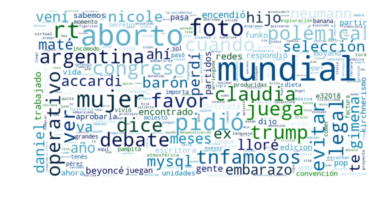

In [40]:
wordcloud = WordCloud(width=800,height=400,max_font_size=80,background_color="white",max_words=500,colormap="ocean").generate(filtered_text)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()

In [48]:
screen_name="lucasprone"

In [49]:
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy

    api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("getting tweets before %s" % (oldest))
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print("...%s tweets downloaded so far" % (len(alltweets)))
    


getting tweets before 485192585724837888
...392 tweets downloaded so far
getting tweets before 357146279471620097
...592 tweets downloaded so far
getting tweets before 268553353372524543
...784 tweets downloaded so far
getting tweets before 165276610071760895
...823 tweets downloaded so far
getting tweets before 55111432219537408
...823 tweets downloaded so far


In [87]:
mis_tweets = ""
for tweet in alltweets:
    print((tweet.text))
    mis_tweets +=(tweet.text)

@daamaariis_ think different üòâ https://t.co/0qRzYLrVdP
Todav√≠a lo tengo üôÇ https://t.co/Thx5Pw0ULX
@podzillacba Crack Seba!!! Exitos!!! üëç
RT @javierbp30: V√≠deo basado en la f√≠sica cu√°ntica. Las bolitas d colores se colocan juntas solas x la resonancia d los cristales d cuarzo.‚Ä¶
RT @UHumanitas: Toma riesgos y que la experiencia sea tu aliada... https://t.co/Esv03Rc1rt
RT @AsocSimuladores: .@SampaoliOficial Conozco un grupo de personas que resuelven cualquier tipo de problemas https://t.co/iRhTlKjXM1
RT @Lalarrabalera: Martes 13, el culo te ABROCHO
#ChromeMusicLab, simple experiments that use the web to let anyone explore how music works. https://t.co/RI77iJGz6s
RT @infobae: Planes y sue√±os de Emiliano Kargieman, el ex hacker que est√° construyendo el "Google satelital" | Por Sebastian Catalano https‚Ä¶
@23Lucreh Siempre hay que tratar de hacer lo que uno ama. Lo imposible solo tarda un poco mas üôÇ
@_GrinGa_ Que antig√ºedad el caf√©, deber√≠a ser un latte en starbucks!!!

Goooooooooooooolllllll!!!!!!!!! #Boca
Goooooooooooooolllllll!!!!!!!!!
P√≥ngame al tanto de la situaci√≥n camarada jajaja, un maestro ravena #LosSimuladores
Tu rid√≠culo n√∫mero 20 jajaja muy groso santos #LosSimuladores
Muri√≥ el artista, naci√≥ la leyenda #ChauFlaco
Noche de lluvia para hacer el saltito de #LosSimuladores
Esperando que empiecen #LosSimuladores
Tiene cara de boludo pero as√≠ como lo ven se clava 5 pajas por d√≠a jajaja muy bueno #LosSimuladores
Simulamos Feller, simulamos #LosSimuladores
Hora de #losSimuladores
Esta tormenta es puro amague
Esperando los afiches de #boca jajaja
Goooooooooooooooooolllllllll!!!!!!!!!!!!!
@frankmb2  ctrl c, ctrl v jajaja mb
@zurdo_villegas  aunque repetidos los veo cada vez que los pasan jajaja
Viendo #LosSimuladores
Telefe insiste con las repeticiones: vuelven "Los Simuladores" http://t.co/r6YsFYy v√≠a @clarincom
@BocaJrsOficial
#EsaCamisetaEsMia
Miro al cielo esperando un cometa
@BebeMusicTW muy bueno es especial de #TheBeatles
Como que 

In [122]:
filtered_text = re.sub(r"http\S+", "", mis_tweets)

In [123]:
filtered_text

'@daamaariis_ think different üòâ  lo tengo üôÇ  Crack Seba!!! Exitos!!! üëçRT @javierbp30: V√≠deo basado en la f√≠sica cu√°ntica. Las bolitas d colores se colocan juntas solas x la resonancia d los cristales d cuarzo.‚Ä¶RT @UHumanitas: Toma riesgos y que la experiencia sea tu aliada...  @AsocSimuladores: .@SampaoliOficial Conozco un grupo de personas que resuelven cualquier tipo de problemas  @Lalarrabalera: Martes 13, el culo te ABROCHO#ChromeMusicLab, simple experiments that use the web to let anyone explore how music works.  @infobae: Planes y sue√±os de Emiliano Kargieman, el ex hacker que est√° construyendo el "Google satelital" | Por Sebastian Catalano  Siempre hay que tratar de hacer lo que uno ama. Lo imposible solo tarda un poco mas üôÇ@_GrinGa_ Que antig√ºedad el caf√©, deber√≠a ser un latte en starbucks!!!üòùRT @LaraFidler: No importa cu√°l sea ni q tan avanzada est√©, si encontras una pel√≠cula de Harry Potter tenes q dejarla@JaimezJacinto Sabanas Disco, se re pone to

In [124]:
# lower to get better comparison
filtered_text = filtered_text.lower()

In [125]:
filtered_text

'@daamaariis_ think different üòâ  lo tengo üôÇ  crack seba!!! exitos!!! üëçrt @javierbp30: v√≠deo basado en la f√≠sica cu√°ntica. las bolitas d colores se colocan juntas solas x la resonancia d los cristales d cuarzo.‚Ä¶rt @uhumanitas: toma riesgos y que la experiencia sea tu aliada...  @asocsimuladores: .@sampaolioficial conozco un grupo de personas que resuelven cualquier tipo de problemas  @lalarrabalera: martes 13, el culo te abrocho#chromemusiclab, simple experiments that use the web to let anyone explore how music works.  @infobae: planes y sue√±os de emiliano kargieman, el ex hacker que est√° construyendo el "google satelital" | por sebastian catalano  siempre hay que tratar de hacer lo que uno ama. lo imposible solo tarda un poco mas üôÇ@_gringa_ que antig√ºedad el caf√©, deber√≠a ser un latte en starbucks!!!üòùrt @larafidler: no importa cu√°l sea ni q tan avanzada est√©, si encontras una pel√≠cula de harry potter tenes q dejarla@jaimezjacinto sabanas disco, se re pone to

In [126]:
filtered_text.replace("@", " ")
filtered_text.replace(punctuation, " ")


'@daamaariis_ think different üòâ  lo tengo üôÇ  crack seba!!! exitos!!! üëçrt @javierbp30: v√≠deo basado en la f√≠sica cu√°ntica. las bolitas d colores se colocan juntas solas x la resonancia d los cristales d cuarzo.‚Ä¶rt @uhumanitas: toma riesgos y que la experiencia sea tu aliada...  @asocsimuladores: .@sampaolioficial conozco un grupo de personas que resuelven cualquier tipo de problemas  @lalarrabalera: martes 13, el culo te abrocho#chromemusiclab, simple experiments that use the web to let anyone explore how music works.  @infobae: planes y sue√±os de emiliano kargieman, el ex hacker que est√° construyendo el "google satelital" | por sebastian catalano  siempre hay que tratar de hacer lo que uno ama. lo imposible solo tarda un poco mas üôÇ@_gringa_ que antig√ºedad el caf√©, deber√≠a ser un latte en starbucks!!!üòùrt @larafidler: no importa cu√°l sea ni q tan avanzada est√©, si encontras una pel√≠cula de harry potter tenes q dejarla@jaimezjacinto sabanas disco, se re pone to

In [129]:
stop_words = stop_words.lower()

# added punctuation symbols used in spanish
punctuation = punctuation + "\'¬ø¬°"

# apply filters
filtered_text = ''.join(c for c in filtered_text if c not in punctuation)
filtered_text = ' '.join([word for word in filtered_text.split() if word not in stop_words])

In [130]:
filtered_text

'daamaariis think different üòâ üôÇ crack seba exitos üëçrt javierbp30 v√≠deo basado f√≠sica cu√°ntica bolitas colores colocan juntas solas x resonancia cristales cuarzo‚Ä¶rt uhumanitas toma riesgos experiencia aliada asocsimuladores sampaolioficial conozco grupo personas resuelven cualquier tipo problemas lalarrabalera martes 13 culo abrochochromemusiclab simple experiments that use the web let anyone explore how music works infobae planes sue√±os emiliano kargieman ex hacker construyendo google satelital sebastian catalano siempre tratar hacer ama imposible solo tarda mas üôÇgringa antig√ºedad caf√© deber√≠a latte starbucksüòùrt larafidler importa cu√°l avanzada encontras pel√≠cula harry potter tenes dejarlajaimezjacinto sabanas disco pone todas noches üòù23lucreh üòÅ raid mosquitos hdp 3daamaariis viernes nene sabe üòú santatrackerhay aprender marearse alturas monta√±a monta√±a vida nunca alcanza cumbre‚Ä¶ puso buena final poloxespnun genio pergolini gusto escucharlo üëçher

In [131]:
from collections import Counter
Counter(filtered_text.split()).most_common()[:20]

[('dormir', 31),
 ('jajaja', 29),
 ('d√≠a', 22),
 ('v√≠a', 18),
 ('pamelacarrasc12', 18),
 ('5', 16),
 ('jajajaj', 15),
 ('feliz', 15),
 ('jajajaja', 15),
 ('ver', 14),
 ('voy', 14),
 ('nikgaturro', 14),
 ('ifrasescitas', 14),
 ('buena', 13),
 ('gente', 13),
 ('coldplay', 13),
 ('the', 12),
 ('mas', 12),
 ('nunca', 12),
 ('mundo', 12)]

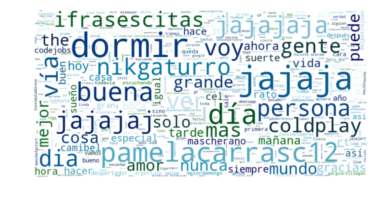

In [134]:
wordcloud = WordCloud(width=800,height=400,max_font_size=80,background_color="white",max_words=500,colormap="ocean", stopwords=stop_words).generate(filtered_text)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()